# Notebook for compiling and analyzing new pmag results from Death Valley 2021 fieldwork

## Death Valley sills thermal demagnetization resutls: 
### a series thermal demag without liquid nitrogen dunk; b series thermal demag with liquid nitrigen dunk

- The LN2 step in b series demag process really removed a significant amount of the PDF overprint in many specimens. 

- site CS1 was demagnetized in a series only. The site has a large pdf overprint that was removed by 400 C. The mt component is well typically between 530 C to 580 C. There is a component that keeps unblocking up above 580. This could be a maghemite or hematite carried component that is a VRM of PDF. But the data is too noisy to make fits. We do not anchor the mt fits. 

- site CS2 was demagnetized in a series only. The site has a pdf overprint that was removed by 200 C. The mt component is well typically between 500 C to 580 C. There is a component that keeps unblocking up above 580. This could be a maghemite or hematite carried component that is a VRM of PDF. But the data is too noisy to make fits. We do not anchor the mt fits.

- site CS3 was both demagnetized in a and b series. It has overall nicely resolved pdf. But the directions do not differ much from the pdf throughout the demagnetization. In geographic coordinates the directions are typically similar to the pdf direction! On the M/M0 plot, the decay of remanence near magnetite unblocking temperature is not very significant. This sill is probabbly quite heavily altered. We do not make mt fits in this site. 

- site CS4 was both demagnetized in a and b series. It has a large pdf overprint, LN2 demagnetized ~ 90% of the remanence in some specimens. Little remanence is left and in bedding coordinates the directions are inconsistent between the specimens. We do not make mt fits in this site.

- site CS5 was both demagnetized in a and b series. LN2 removed ~80% of remanence in some specimens but did not help isolating the primary component. Only a couple of specimens preserved a small, noisy primary component (5-3a and 5-5a) in a series but it is too noisy in the b series. 

 - site CS6 was demagnetized in a series only. It has a consistent, strong primary mt component that we interpret as the primary emplacement component ca. 1098 Ma. There is a high temperature component beyond 580 C. This could be a maghemite or hematite carried component that is a VRM of PDF. But the data is too noisy to make fits. We do not anchor the mt fits.

- site CS7 has a large pdf. This overprint component can be removed by liquid nitrogen dunk and heating up to ~250 C. Only two specimens (4 and 5 in both a and b series) have a primary component unblocking ca. 500-580 C. In both series these two samples give similar fitted directions. Other samples have largely been completely overprinted such that a direction similar to those of -4 and -5 is hinted in the thermal demag steps but not resolved.

- site CS8 was demagnetized in a series only. It has a pdf component that can be removed by up to 475 C, followed by by nice consistent sharply unblocking primary magnetite component from ~530 C to 580 C. There is an additional higher temperature component that is not well resolved. 

- site CS9 was both demagnetized in a and b series. It has a large pdf overprint that can be removed by LN2 dunk and heating up to ~150-250 C. It looks like the a series without liquid nitrogen dunk is resulted in cleaner data than the b series. This could be due to the b series containing more end chips and thus have overall weaker total magnetization than a series specimens. Another possibility which I think is more likely is that the liquid nitrogen dunk actually resulted in randomization of the magnetite grains that carry the higher temperature component magnetization which in this case caused noise that has high ratios in intensity relative to the signal. This resulted in only three specimens having interpretable mt component in the b series versus 5 in the a series. We use a series data for the mt fits. 

- site CS10 was both demagnetized in a and b series. It has a pdf component that can be removed largely by LN2 dunk or by heating up to 300-400 C. It appears to have a consistent easterly overprint component that unblocks through magnetite Curie temperature. 

- site CS11 was both demagnetized in a and b series. It doesn't have consistent site level directions. A few specimens have an easterly overprint component that unblocks through magnetite Curie temperature similar to those in site CS10. 

- site CS12 was both demagnetized in a and b series. It has a large pdf overprint that can be removed largely by LN2 dunk or by heating up to 300-400 C. LN2 helps removing the PDF overprint component and more specimens yielded interpretable mt components. 

- site CS13 was both demagnetized in a and b series. It has a large pdf overprint that can be removed by LN2 dunk and heating up to ~150-250 C. It looks like the a series without liquid nitrogen dunk is resulted in cleaner data than the b series. This could be similar to site CS9. 

- site CS14 was both demagnetized in a and b series. It does not have very consistent directions except for a lt component. 

- site CS15 was both demagnetized in a and b series. It has a large pdf overprint that can be removed by LN2 dunk and heating up to ~250-400 C. There is not a consistent component that can be fitted through higher temperatures. 


## Death Valley sill pmag and geochron sample correlation

- CS1 (F2020_5) (1097.91 ± 0.29 Ma) geochron sample collected by Francis MacDonald in 2020 in Warm Spring Canyon, Panamint Mountains, was a felsic segregation within a mafic sill. The sample was interpreted in the field to be likely correlative with the thick lower sill sampled as CS1. 

- CS4 (1098.27 ± 0.27 Ma) geochron sample collected by Nick Swanson-Hysell, Nick Anderson, and Yiming Zhang in Warm Spring Canyon, Panamint Mountains. This sample is from a felsic dike within a mafic sill. 

- CS7 (1098.09 ± 0.91 Ma) geochron sample collected by Nick Swanson-Hysell, Nick Anderson, and Yiming Zhang in Ibex Range. This sample is a ~5 cm wide felsic dike within a mafic sill. 


## import python packages


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as colors

import cartopy.crs as ccrs

import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag

%matplotlib inline

## new function for plotting the Bayesian PEP APWP synthesis

In [24]:
pole_lon = np.loadtxt('../data/mcplates_results/pole_lon_positions_2_true.txt')
pole_lat = np.loadtxt('../data/mcplates_results/pole_lat_positions_2_true.txt')
    
def plot_APWP(pole_lon = pole_lon, pole_lat=pole_lat, figsize = (8,8)):
    m = ipmag.make_orthographic_map(central_longitude=200, central_latitude=20, figsize=figsize, land_edge_color='None')

    synthetic_ages = [1080, 1085, 1090, 1095, 1100, 1105, 1110]
    cNorm  = colors.Normalize(vmin=min(synthetic_ages), vmax=max(synthetic_ages))
    scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis')

    synthetic_colors = [colors.rgb2hex(scalarMap.to_rgba(synthetic_ages[i])) for i in range(len(synthetic_ages))]

    fisher0 = ipmag.fisher_mean(pole_lon[:,0]+180,pole_lat[:,0])
    theta0 = ipmag.fisher_angular_deviation(pole_lon[:,0]+180,pole_lat[:,0])
    fisher0['theta'] = theta0
    ipmag.plot_pole(m,fisher0['dec'],fisher0['inc'],theta0,color=synthetic_colors[0],edgecolor=None,label='1110 Ma')

    fisher1 = ipmag.fisher_mean(pole_lon[:,1]+180,pole_lat[:,1])
    theta1 = ipmag.fisher_angular_deviation(pole_lon[:,1]+180,pole_lat[:,1])
    fisher1['theta'] = theta1
    ipmag.plot_pole(m,fisher1['dec'],fisher1['inc'],theta1,color=synthetic_colors[1],edgecolor=None,label='1105 Ma')

    fisher2 = ipmag.fisher_mean(pole_lon[:,2]+180,pole_lat[:,2])
    theta2 = ipmag.fisher_angular_deviation(pole_lon[:,2]+180,pole_lat[:,2])
    fisher2['theta'] = theta2
    ipmag.plot_pole(m,fisher2['dec'],fisher2['inc'],theta2,color=synthetic_colors[2],edgecolor=None,label='1100 Ma')

    fisher3 = ipmag.fisher_mean(pole_lon[:,3]+180,pole_lat[:,3])
    theta3 = ipmag.fisher_angular_deviation(pole_lon[:,3]+180,pole_lat[:,3])
    fisher3['theta'] = theta3
    ipmag.plot_pole(m,fisher3['dec'],fisher3['inc'],theta3,color=synthetic_colors[3],edgecolor=None,label='1095 Ma')

    fisher4 = ipmag.fisher_mean(pole_lon[:,4]+180,pole_lat[:,4])
    theta4 = ipmag.fisher_angular_deviation(pole_lon[:,4]+180,pole_lat[:,4])
    fisher4['theta'] = theta4
    ipmag.plot_pole(m,fisher4['dec'],fisher4['inc'],theta4,color=synthetic_colors[4],edgecolor=None,label='1090 Ma')

    fisher5 = ipmag.fisher_mean(pole_lon[:,5]+180,pole_lat[:,5])
    theta5 = ipmag.fisher_angular_deviation(pole_lon[:,5]+180,pole_lat[:,5])
    fisher5['theta'] = theta5
    ipmag.plot_pole(m,fisher5['dec'],fisher5['inc'],theta5,color=synthetic_colors[5],edgecolor=None,label='1085 Ma')

    fisher6 = ipmag.fisher_mean(pole_lon[:,6]+180,pole_lat[:,6])
    theta6 = ipmag.fisher_angular_deviation(pole_lon[:,6]+180,pole_lat[:,6])
    fisher6['theta'] = theta6
    ipmag.plot_pole(m,fisher6['dec'],fisher6['inc'],theta6,color=synthetic_colors[6],edgecolor=None,label='1080 Ma')
    
    return m    

## load the MagIC data files

In [2]:
# get the specimen level data
thermal_demag_a_spec = pd.read_csv('../data/Pmag_new/Death_Valley_thermal_demag_a/specimens.txt', sep='\t', header=1)
thermal_demag_b_spec = pd.read_csv('../data/pmag_new/Death_Valley_thermal_demag_b/specimens.txt', sep='\t', header=1)

# get the site level data
thermal_demag_a_site = pd.read_csv('../data/pmag_new/Death_Valley_thermal_demag_a/sites.txt', sep='\t', header=1)
thermal_demag_b_site = pd.read_csv('../data/pmag_new/Death_Valley_thermal_demag_b/sites.txt', sep='\t', header=1)

## summarize the site level lt component (present day field directions)

In [3]:
# let's first calculate pdf at Death Valley

DV_lat, DV_lon = 35.8, -116.4
pdf_dec, pdf_inc, _ = ipmag.igrf([2023, 0, DV_lat, DV_lon])

In [4]:
thermal_demag_a_lt_geo = thermal_demag_a_site[(thermal_demag_a_site['dir_comp_name']=='lt') & (thermal_demag_a_site['dir_tilt_correction']==0)].reset_index(drop=1)
thermal_demag_b_lt_geo = thermal_demag_b_site[(thermal_demag_b_site['dir_comp_name']=='lt') & (thermal_demag_b_site['dir_tilt_correction']==0)].reset_index(drop=1)

# thermal_demag_b_lt_geo.dir_alpha95

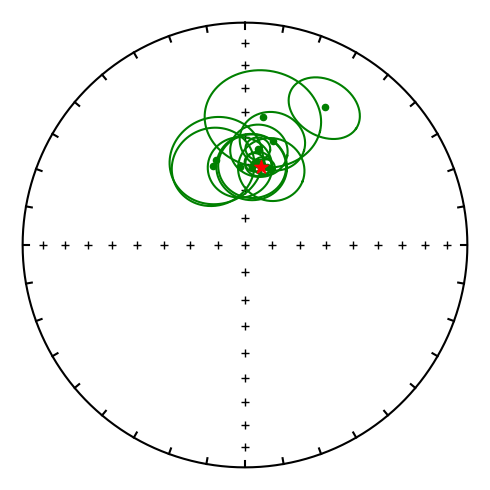

In [5]:
# plot a series pdf means
plt.figure(figsize=(5,5))
ipmag.plot_net()

for i in range(len(thermal_demag_a_lt_geo)):
    ipmag.plot_di_mean(thermal_demag_a_lt_geo['dir_dec'][i], thermal_demag_a_lt_geo['dir_inc'][i], thermal_demag_a_lt_geo['dir_alpha95'][i], color='g')

ipmag.plot_di(pdf_dec, pdf_inc, marker='*', markersize=100, color='r', zorder=100)

plt.savefig('code_output/DV_PDF_a_series.pdf', bbox_inches='tight')
plt.show()


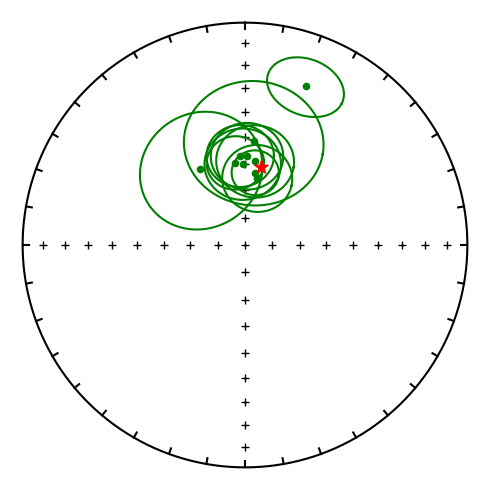

In [6]:
# plot b series pdf means
plt.figure(figsize=(5,5))
ipmag.plot_net()

for i in range(len(thermal_demag_b_lt_geo)):
    ipmag.plot_di_mean(thermal_demag_b_lt_geo['dir_dec'][i], thermal_demag_b_lt_geo['dir_inc'][i], thermal_demag_b_lt_geo['dir_alpha95'][i], color='g')

ipmag.plot_di(pdf_dec, pdf_inc, marker='*', markersize=100, color='r', zorder=100)


## Now lets deal with mt component directions

In [7]:
# CS1 a series data in tilt corrected coordinates
CS1_mt_spec = thermal_demag_a_spec[(thermal_demag_a_spec['site']=='CS1') & 
                                (thermal_demag_a_spec['dir_tilt_correction']==100) & 
                                (thermal_demag_a_spec['dir_comp']=='mt')].reset_index(drop=1)
CS1_mt_site = thermal_demag_a_site[(thermal_demag_a_site['site']=='CS1') &
                                    (thermal_demag_a_site['dir_comp_name']=='mt') &
                                    (thermal_demag_a_site['dir_tilt_correction']==100)].reset_index(drop=1)

# CS2 a series data in tilt corrected coordinates
CS2_mt_spec = thermal_demag_a_spec[(thermal_demag_a_spec['site']=='CS2') & 
                                (thermal_demag_a_spec['dir_tilt_correction']==100)& 
                                (thermal_demag_a_spec['dir_comp']=='mt')].reset_index(drop=1)
CS2_mt_site = thermal_demag_a_site[(thermal_demag_a_site['site']=='CS2') &
                                    (thermal_demag_a_site['dir_comp_name']=='mt') &
                                    (thermal_demag_a_site['dir_tilt_correction']==100)].reset_index(drop=1)

# CS5 a series data for 3a and 5a in tilt corrected coordinates
CS5_mt_spec = thermal_demag_a_spec[(thermal_demag_a_spec['site']=='CS5') & 
                                (thermal_demag_a_spec['dir_tilt_correction']==100) & 
                                (thermal_demag_a_spec['dir_comp']=='mt')].reset_index(drop=1)
CS5_mt_site = thermal_demag_a_site[(thermal_demag_a_site['site']=='CS5') &
                                    (thermal_demag_a_site['dir_comp_name']=='mt') &
                                    (thermal_demag_a_site['dir_tilt_correction']==100)].reset_index(drop=1)

# CS6 a series data in tilt corrected coordinates
CS6_mt_spec = thermal_demag_a_spec[(thermal_demag_a_spec['site']=='CS6') & 
                                (thermal_demag_a_spec['dir_tilt_correction']==100) & 
                                (thermal_demag_a_spec['dir_comp']=='mt')].reset_index(drop=1)
CS6_mt_site = thermal_demag_a_site[(thermal_demag_a_site['site']=='CS6') &
                                (thermal_demag_a_site['dir_comp_name']=='mt') &
                                (thermal_demag_a_site['dir_tilt_correction']==100)].reset_index(drop=1)

# CS7 a series data for sample 4 and 5 look better than in b series
CS7_mt_spec = thermal_demag_a_spec[(thermal_demag_a_spec['site']=='CS7') & 
                                (thermal_demag_a_spec['dir_tilt_correction']==100) & 
                                (thermal_demag_a_spec['dir_comp']=='mt')].reset_index(drop=1)
CS7_mt_site = thermal_demag_a_site[(thermal_demag_a_site['site']=='CS7') &
                                    (thermal_demag_a_site['dir_comp_name']=='mt') &
                                    (thermal_demag_a_site['dir_tilt_correction']==100)].reset_index(drop=1)

# CS8 a series data in tilt corrected coordinates
CS8_mt_spec = thermal_demag_a_spec[(thermal_demag_a_spec['site']=='CS8') & 
                                (thermal_demag_a_spec['dir_tilt_correction']==100) & 
                                (thermal_demag_a_spec['dir_comp']=='mt')].reset_index(drop=1)
CS8_mt_site = thermal_demag_a_site[(thermal_demag_a_site['site']=='CS8') &
                                    (thermal_demag_a_site['dir_comp_name']=='mt') &
                                    (thermal_demag_a_site['dir_tilt_correction']==100)].reset_index(drop=1)

# CS9 a series data in tilt corrected coordinates
CS9_mt_spec = thermal_demag_a_spec[(thermal_demag_a_spec['site']=='CS9') & 
                                (thermal_demag_a_spec['dir_tilt_correction']==100) & 
                                (thermal_demag_a_spec['dir_comp']=='mt')].reset_index(drop=1)
CS9_mt_site = thermal_demag_a_site[(thermal_demag_a_site['site']=='CS9') &
                                    (thermal_demag_a_site['dir_comp_name']=='mt') &
                                    (thermal_demag_a_site['dir_tilt_correction']==100)].reset_index(drop=1)

# CS12 b series data in tilt corrected coordinates
CS12_mt_spec = thermal_demag_b_spec[(thermal_demag_b_spec['site']=='CS12') & 
                                 (thermal_demag_b_spec['dir_tilt_correction']==100) & 
                                (thermal_demag_b_spec['dir_comp']=='mt')].reset_index(drop=1)
CS12_mt_site = thermal_demag_b_site[(thermal_demag_b_site['site']=='CS12') &
                                    (thermal_demag_b_site['dir_comp_name']=='mt') &
                                    (thermal_demag_b_site['dir_tilt_correction']==100)].reset_index(drop=1)

# CS13 a series data in tilt corrected coordinates
CS13_mt_spec = thermal_demag_a_spec[(thermal_demag_a_spec['site']=='CS13') & 
                                 (thermal_demag_a_spec['dir_tilt_correction']==100) & 
                                (thermal_demag_a_spec['dir_comp']=='mt')].reset_index(drop=1)
CS13_mt_site = thermal_demag_a_site[(thermal_demag_a_site['site']=='CS13') &
                                    (thermal_demag_a_site['dir_comp_name']=='mt') &
                                    (thermal_demag_a_site['dir_tilt_correction']==100)].reset_index(drop=1)


## Panamint Range

### CS1 mt directions

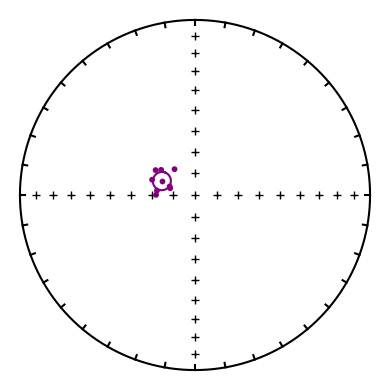

In [8]:
plt.figure(figsize=(4,4))
ipmag.plot_net()
ipmag.plot_di(CS1_mt_spec['dir_dec'], CS1_mt_spec['dir_inc'], marker='o', markersize=10, color='purple')
ipmag.plot_di_mean(CS1_mt_site['dir_dec'][0], CS1_mt_site['dir_inc'][0], CS1_mt_site['dir_alpha95'][0], marker='o', markersize=10, color='purple')

### CS2 mt directions

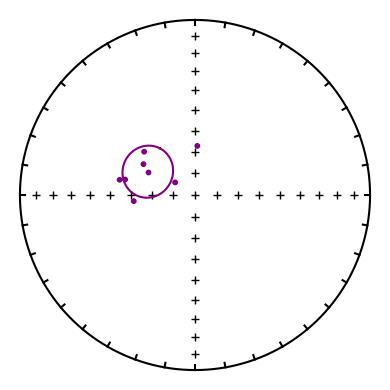

In [9]:
plt.figure(figsize=(4,4))
ipmag.plot_net()
ipmag.plot_di(CS2_mt_spec['dir_dec'], CS2_mt_spec['dir_inc'], marker='o', markersize=10, color='purple')
ipmag.plot_di_mean(CS2_mt_site['dir_dec'][0], CS2_mt_site['dir_inc'][0], CS2_mt_site['dir_alpha95'][0], marker='o', markersize=10, color='purple')

### CS5 mt directions

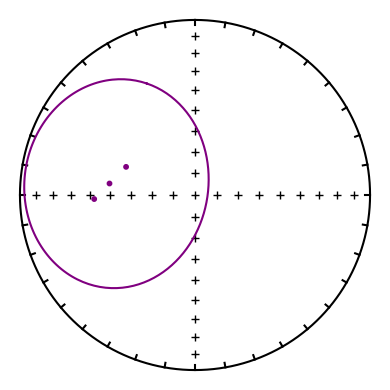

In [10]:
plt.figure(figsize=(4,4))
ipmag.plot_net()
ipmag.plot_di(CS5_mt_spec['dir_dec'], CS5_mt_spec['dir_inc'], marker='o', markersize=10, color='purple')
ipmag.plot_di_mean(CS5_mt_site['dir_dec'][0], CS5_mt_site['dir_inc'][0], CS5_mt_site['dir_alpha95'][0], marker='o', markersize=10, color='purple')

### CS6 mt directions

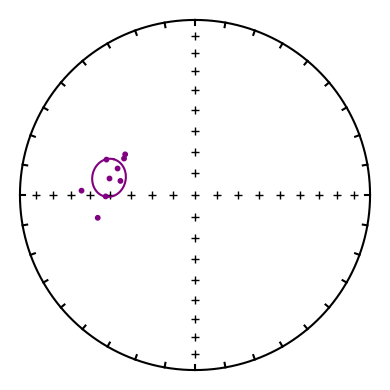

In [11]:
plt.figure(figsize=(4,4))
ipmag.plot_net()
ipmag.plot_di(CS6_mt_spec['dir_dec'], CS6_mt_spec['dir_inc'], marker='o', markersize=10, color='purple')
ipmag.plot_di_mean(CS6_mt_site['dir_dec'][0], CS6_mt_site['dir_inc'][0], CS6_mt_site['dir_alpha95'][0], marker='o', markersize=10, color='purple')

## Ibex Range

### CS7 mt directions

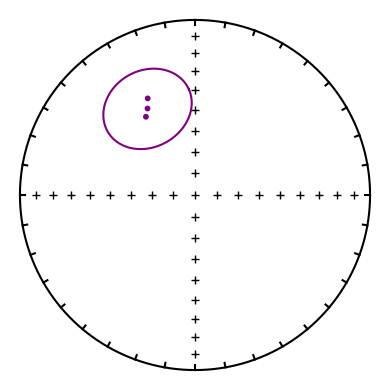

In [12]:
plt.figure(figsize=(4,4))
ipmag.plot_net()
ipmag.plot_di(CS7_mt_spec['dir_dec'], CS7_mt_spec['dir_inc'], marker='o', markersize=10, color='purple')
ipmag.plot_di_mean(CS7_mt_site['dir_dec'][0], CS7_mt_site['dir_inc'][0], CS7_mt_site['dir_alpha95'][0], marker='o', markersize=10, color='purple')

### CS8 mt directions

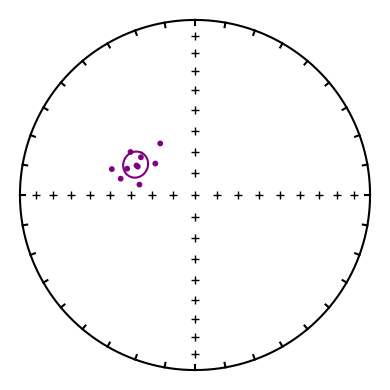

In [13]:
plt.figure(figsize=(4,4))
ipmag.plot_net()
ipmag.plot_di(CS8_mt_spec['dir_dec'], CS8_mt_spec['dir_inc'], marker='o', markersize=10, color='purple')
ipmag.plot_di_mean(CS8_mt_site['dir_dec'][0], CS8_mt_site['dir_inc'][0], CS8_mt_site['dir_alpha95'][0], marker='o', markersize=10, color='purple')

### CS9 mt directions

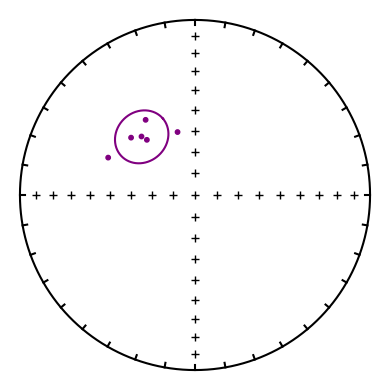

In [14]:
plt.figure(figsize=(4,4))
ipmag.plot_net()
ipmag.plot_di(CS9_mt_spec['dir_dec'], CS9_mt_spec['dir_inc'], marker='o', markersize=10, color='purple')
ipmag.plot_di_mean(CS9_mt_site['dir_dec'][0], CS9_mt_site['dir_inc'][0], CS9_mt_site['dir_alpha95'][0], marker='o', markersize=10, color='purple')

## Nopah and Alexander Ranges

### CS12 mt directions

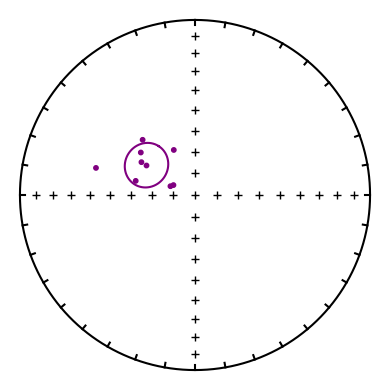

In [15]:
plt.figure(figsize=(4,4))
ipmag.plot_net()
ipmag.plot_di(CS12_mt_spec['dir_dec'], CS12_mt_spec['dir_inc'], marker='o', markersize=10, color='purple')
ipmag.plot_di_mean(CS12_mt_site['dir_dec'][0], CS12_mt_site['dir_inc'][0], CS12_mt_site['dir_alpha95'][0], marker='o', markersize=10, color='purple')

### CS13 mt directions

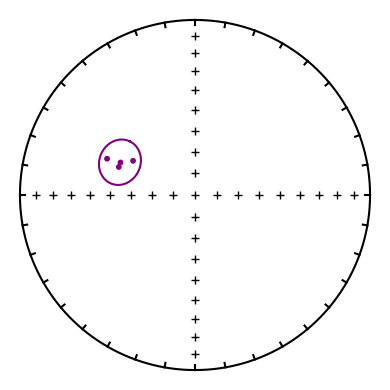

In [16]:
plt.figure(figsize=(4,4))
ipmag.plot_net()
ipmag.plot_di(CS13_mt_spec['dir_dec'], CS13_mt_spec['dir_inc'], marker='o', markersize=10, color='purple')
ipmag.plot_di_mean(CS13_mt_site['dir_dec'][0], CS13_mt_site['dir_inc'][0], CS13_mt_site['dir_alpha95'][0], marker='o', markersize=10, color='purple')

## summarize mt component site mean directions

<module 'matplotlib.pyplot' from '/Users/yimingzhang/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

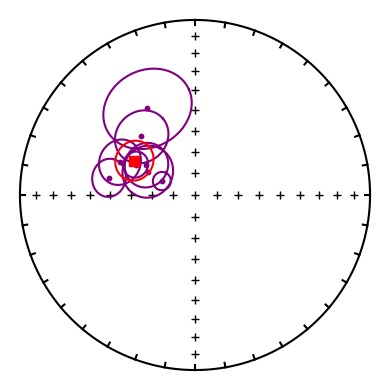

In [17]:
plt.figure(figsize=(4,4))
ipmag.plot_net()
ipmag.plot_di_mean(CS1_mt_site['dir_dec'][0], CS1_mt_site['dir_inc'][0], CS1_mt_site['dir_alpha95'][0], marker='o', markersize=10, color='purple')
ipmag.plot_di_mean(CS2_mt_site['dir_dec'][0], CS2_mt_site['dir_inc'][0], CS2_mt_site['dir_alpha95'][0], marker='o', markersize=10, color='purple')
# ipmag.plot_di_mean(CS5_mt_site['dir_dec'][0], CS5_mt_site['dir_inc'][0], CS5_mt_site['dir_alpha95'][0], marker='o', markersize=10, color='purple')
ipmag.plot_di_mean(CS6_mt_site['dir_dec'][0], CS6_mt_site['dir_inc'][0], CS6_mt_site['dir_alpha95'][0], marker='o', markersize=10, color='purple')
ipmag.plot_di_mean(CS7_mt_site['dir_dec'][0], CS7_mt_site['dir_inc'][0], CS7_mt_site['dir_alpha95'][0], marker='o', markersize=10, color='purple')
ipmag.plot_di_mean(CS8_mt_site['dir_dec'][0], CS8_mt_site['dir_inc'][0], CS8_mt_site['dir_alpha95'][0], marker='o', markersize=10, color='purple')
ipmag.plot_di_mean(CS9_mt_site['dir_dec'][0], CS9_mt_site['dir_inc'][0], CS9_mt_site['dir_alpha95'][0], marker='o', markersize=10, color='purple')
ipmag.plot_di_mean(CS12_mt_site['dir_dec'][0], CS12_mt_site['dir_inc'][0], CS12_mt_site['dir_alpha95'][0], marker='o', markersize=10, color='purple')
ipmag.plot_di_mean(CS13_mt_site['dir_dec'][0], CS13_mt_site['dir_inc'][0], CS13_mt_site['dir_alpha95'][0], marker='o', markersize=10, color='purple')

site_mt_dec_list = [CS1_mt_site['dir_dec'][0], CS2_mt_site['dir_dec'][0], CS5_mt_site['dir_dec'][0], CS6_mt_site['dir_dec'][0], CS7_mt_site['dir_dec'][0], CS8_mt_site['dir_dec'][0], CS9_mt_site['dir_dec'][0], CS12_mt_site['dir_dec'][0], CS13_mt_site['dir_dec'][0]]
site_mt_inc_list = [CS1_mt_site['dir_inc'][0], CS2_mt_site['dir_inc'][0], CS5_mt_site['dir_inc'][0], CS6_mt_site['dir_inc'][0], CS7_mt_site['dir_inc'][0], CS8_mt_site['dir_inc'][0], CS9_mt_site['dir_inc'][0], CS12_mt_site['dir_inc'][0], CS13_mt_site['dir_inc'][0]]

all_mt_mean_dir = ipmag.fisher_mean(site_mt_dec_list, site_mt_inc_list)
ipmag.plot_di_mean(all_mt_mean_dir['dec'], all_mt_mean_dir['inc'], all_mt_mean_dir['alpha95'], marker='s', markersize=50, color='r')
plt.savefig('code_output/DV_site_mt_directions.pdf', bbox_inches='tight')
plt

## summarize mt component VGP directions

In [18]:
# site_mt_plon_list = [CS1_mt_site['vgp_lon'][0], CS2_mt_site['vgp_lon'][0], CS5_mt_site['vgp_lon'][0], CS6_mt_site['vgp_lon'][0], 
#                      CS7_mt_site['vgp_lon'][0], CS8_mt_site['vgp_lon'][0], CS9_mt_site['vgp_lon'][0], CS12_mt_site['vgp_lon'][0], CS13_mt_site['vgp_lon'][0]]
# site_mt_plat_list = [CS1_mt_site['vgp_lat'][0], CS2_mt_site['vgp_lat'][0], CS5_mt_site['vgp_lat'][0], CS6_mt_site['vgp_lat'][0], 
#                      CS7_mt_site['vgp_lat'][0], CS8_mt_site['vgp_lat'][0], CS9_mt_site['vgp_lat'][0], CS12_mt_site['vgp_lat'][0], CS13_mt_site['vgp_lat'][0]]

site_mt_plon_list = [CS1_mt_site['vgp_lon'][0], CS2_mt_site['vgp_lon'][0], CS6_mt_site['vgp_lon'][0], 
                     CS7_mt_site['vgp_lon'][0], CS8_mt_site['vgp_lon'][0], CS9_mt_site['vgp_lon'][0], CS12_mt_site['vgp_lon'][0], CS13_mt_site['vgp_lon'][0]]
site_mt_plat_list = [CS1_mt_site['vgp_lat'][0], CS2_mt_site['vgp_lat'][0], CS6_mt_site['vgp_lat'][0], 
                     CS7_mt_site['vgp_lat'][0], CS8_mt_site['vgp_lat'][0], CS9_mt_site['vgp_lat'][0], CS12_mt_site['vgp_lat'][0], CS13_mt_site['vgp_lat'][0]]

all_mt_pole_mean = ipmag.fisher_mean(site_mt_plon_list, site_mt_plat_list)
all_mt_pole_mean

{'dec': 176.66873555145588,
 'inc': 44.894623256333205,
 'n': 8,
 'r': 7.692750639477589,
 'k': 22.782797621117982,
 'alpha95': 11.85604490708278,
 'csd': 16.96998633885946}

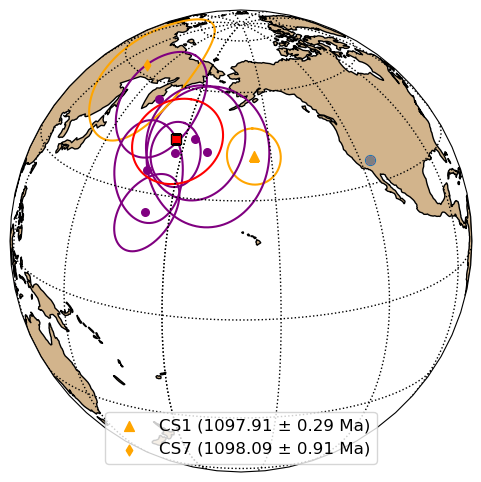

In [19]:
ax = ipmag.make_orthographic_map(200, 20, figsize=(6,6))
ipmag.plot_pole_dp_dm(ax, CS1_mt_site['vgp_lon'][0], CS1_mt_site['vgp_lat'][0], 
                      slon=DV_lon, slat=DV_lat, 
                      dp=CS1_mt_site['vgp_dp'][0], dm=CS1_mt_site['vgp_dm'][0], 
                      pole_color='orange', pole_marker='^', pole_edgecolor = None, markersize=50, pole_label='CS1 (1097.91 ± 0.29 Ma)',
                      site_color=None, site_edgecolor=None, site_marker=None, site_label=None)
ipmag.plot_pole_dp_dm(ax, CS2_mt_site['vgp_lon'][0], CS2_mt_site['vgp_lat'][0], 
                      slon=DV_lon, slat=DV_lat, 
                      dp=CS2_mt_site['vgp_dp'][0], dm=CS2_mt_site['vgp_dm'][0], 
                      pole_color='purple', pole_marker='o', pole_edgecolor = None, markersize=30, pole_label=None,
                      site_color=None, site_edgecolor=None, site_marker=None, site_label=None)
# ipmag.plot_pole_dp_dm(ax, CS5_mt_site['vgp_lon'][0], CS5_mt_site['vgp_lat'][0], 
#                       slon=DV_lon, slat=DV_lat, 
#                       dp=CS5_mt_site['vgp_dp'][0], dm=CS5_mt_site['vgp_dm'][0], 
#                       pole_color='purple', pole_marker='o', markersize=10, 
#                       site_color=None, site_edgecolor=None, site_marker=None, site_label=None)
ipmag.plot_pole_dp_dm(ax, CS6_mt_site['vgp_lon'][0], CS6_mt_site['vgp_lat'][0], 
                      slon=DV_lon, slat=DV_lat, 
                      dp=CS6_mt_site['vgp_dp'][0], dm=CS6_mt_site['vgp_dm'][0], 
                      pole_color='purple', pole_marker='o', pole_edgecolor = None, markersize=30, pole_label=None,
                      site_color=None, site_edgecolor=None, site_marker=None, site_label=None)
ipmag.plot_pole_dp_dm(ax, CS7_mt_site['vgp_lon'][0], CS7_mt_site['vgp_lat'][0], 
                      slon=DV_lon, slat=DV_lat, 
                      dp=CS7_mt_site['vgp_dp'][0], dm=CS7_mt_site['vgp_dm'][0], 
                      pole_color='orange', pole_marker='d', pole_edgecolor = None, markersize=30, pole_label='CS7 (1098.09 ± 0.91 Ma)',
                      site_color=None, site_edgecolor=None, site_marker=None, site_label=None)
ipmag.plot_pole_dp_dm(ax, CS8_mt_site['vgp_lon'][0], CS8_mt_site['vgp_lat'][0], 
                      slon=DV_lon, slat=DV_lat, 
                      dp=CS8_mt_site['vgp_dp'][0], dm=CS8_mt_site['vgp_dm'][0], 
                      pole_color='purple', pole_marker='o', pole_edgecolor = None, markersize=30,pole_label=None,
                      site_color=None, site_edgecolor=None, site_marker=None, site_label=None)
ipmag.plot_pole_dp_dm(ax, CS9_mt_site['vgp_lon'][0], CS9_mt_site['vgp_lat'][0], 
                      slon=DV_lon, slat=DV_lat, 
                      dp=CS9_mt_site['vgp_dp'][0], dm=CS9_mt_site['vgp_dm'][0], 
                      pole_color='purple', pole_marker='o', pole_edgecolor = None, markersize=30, pole_label=None,
                      site_color=None, site_edgecolor=None, site_marker=None, site_label=None)
ipmag.plot_pole_dp_dm(ax, CS12_mt_site['vgp_lon'][0], CS12_mt_site['vgp_lat'][0], 
                      slon=DV_lon, slat=DV_lat, 
                      dp=CS12_mt_site['vgp_dp'][0], dm=CS12_mt_site['vgp_dm'][0], 
                      pole_color='purple', pole_marker='o', pole_edgecolor = None, markersize=30, pole_label=None,
                      site_color=None, site_edgecolor=None, site_marker=None, site_label=None)
ipmag.plot_pole_dp_dm(ax, CS13_mt_site['vgp_lon'][0], CS13_mt_site['vgp_lat'][0], 
                      slon=DV_lon, slat=DV_lat,
                        dp=CS13_mt_site['vgp_dp'][0], dm=CS13_mt_site['vgp_dm'][0], 
                        pole_color='purple', pole_marker='o', pole_edgecolor = None, markersize=30, pole_label=None,
                        site_color=None, site_edgecolor=None, site_marker=None, site_label=None)


ipmag.plot_pole(ax, all_mt_pole_mean['dec'], all_mt_pole_mean['inc'], all_mt_pole_mean['alpha95'], color='r', marker='s', markersize=50)
plt.legend(loc=8, fontsize=12)
plt.show()

In [20]:
all_mt_pole_mean_cor = pmag.pt_rot([DV_lat, DV_lon, 5], [all_mt_pole_mean['inc']], [all_mt_pole_mean['dec']])
all_mt_pole_mean_cor

([41.183089315816495], [178.0680000387598])

In [21]:
all_mt_pole_mean

{'dec': 176.66873555145588,
 'inc': 44.894623256333205,
 'n': 8,
 'r': 7.692750639477589,
 'k': 22.782797621117982,
 'alpha95': 11.85604490708278,
 'csd': 16.96998633885946}

## plot mean pole in context of the Keweenawan Track

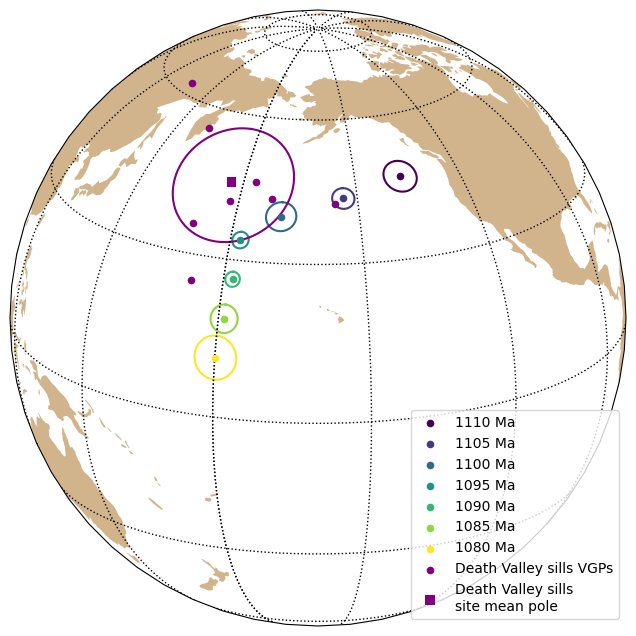

In [34]:
m = plot_APWP()

ipmag.plot_vgp(m, site_mt_plon_list, site_mt_plat_list, color='purple', marker='o', edge=None, label='Death Valley sills VGPs')

ipmag.plot_pole(m, all_mt_pole_mean['dec'], all_mt_pole_mean['inc'], all_mt_pole_mean['alpha95'], 
                color='purple', edgecolor='none', marker='s', markersize=50, label='Death Valley sills\nsite mean pole')
# ipmag.plot_pole(m, all_mt_pole_mean_cor[1][0], all_mt_pole_mean_cor[0][0], all_mt_pole_mean['alpha95'], color='r', marker='s', markersize=50, label='Death Valley sills site mean pole\n(block rotation corrected)')

plt.legend(loc='lower right')
plt.savefig('code_output/DV_pole.pdf', bbox_inches='tight')

plt.show()